In [1]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


1.Import and Explore the Dataset

In [15]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/task1/Titanic-Dataset.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2. Handle Missing Values

In [19]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-19-f5ca8eea972e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-19-f5ca8eea972e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

3.Encode Categorical Features

In [20]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(columns=['Name', 'Ticket'], inplace=True)

print(df.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


4.Normalize/Standardize Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())


   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0            1         0  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
1            2         1 -1.566107  0.663861  0.432793 -0.473674  0.786845   
2            3         1  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4            5         0  0.827377  0.433312 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  


5.Visualize and Remove Outliers

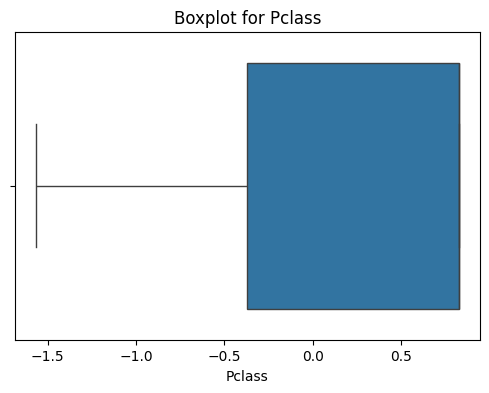

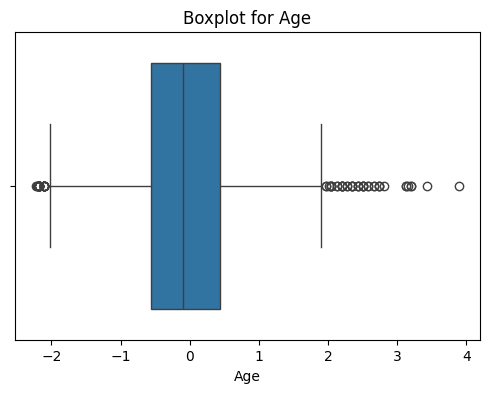

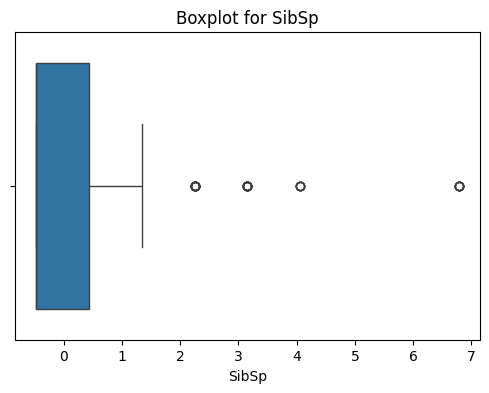

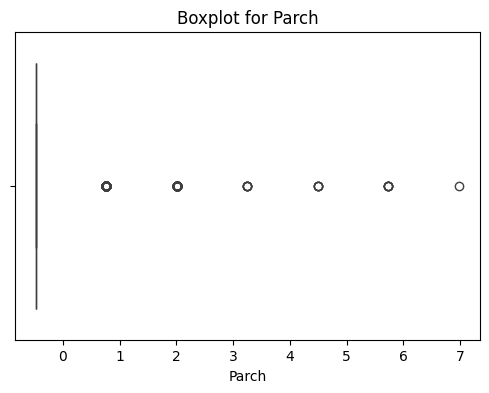

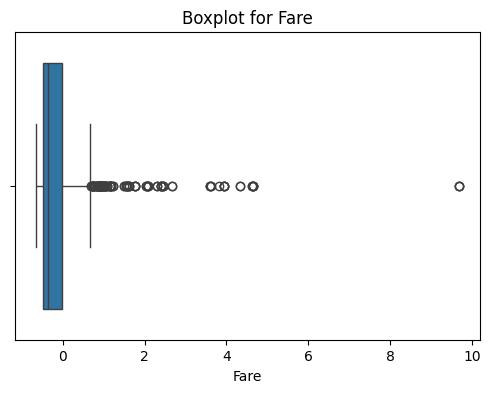

Shape after removing outliers: (561, 10)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after removing outliers:", df.shape)
